In [2]:
from keras.models import load_model
import keraOverlay as overlay
import numpy as np
import matplotlib.pyplot as plt 
import utils

/home/yuan/Software/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#Load preliminary trained model
model = load_model('Scale_down64.h5', custom_objects={'dice_coef_loss': overlay.dice_coef_loss,
                                                      'dice_coef': overlay.dice_coef})

In [9]:
#Predict all validation data
# Load data and masks as dicom files
data_dir = '../../data'                   #Please change the path accordingly before make any changes
validation_names = data_dir + '/GoodData_256auto.txt'
#img_dir = data_dir + '/validation_data'
img_dir = data_dir + '/256Auto/images'

namelist = []
with open(validation_names) as f:
    content = f.readlines()
    namelist = [x.strip() for x in content] 
x_list = utils.load_images(img_dir, namelist, scaling=4, OPaslist=True)

15
(64, 64, 64)


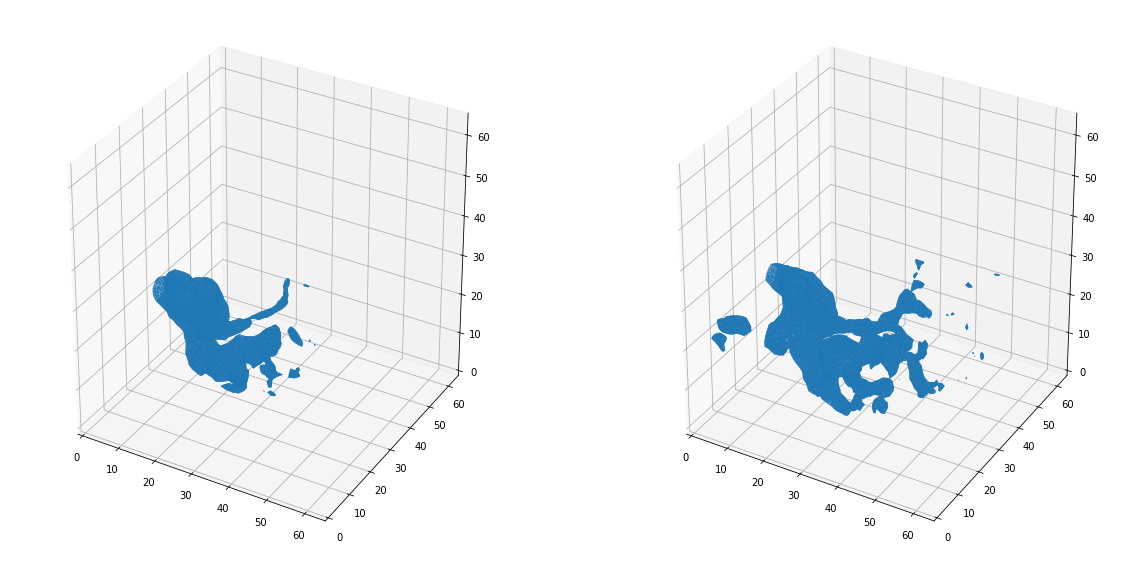

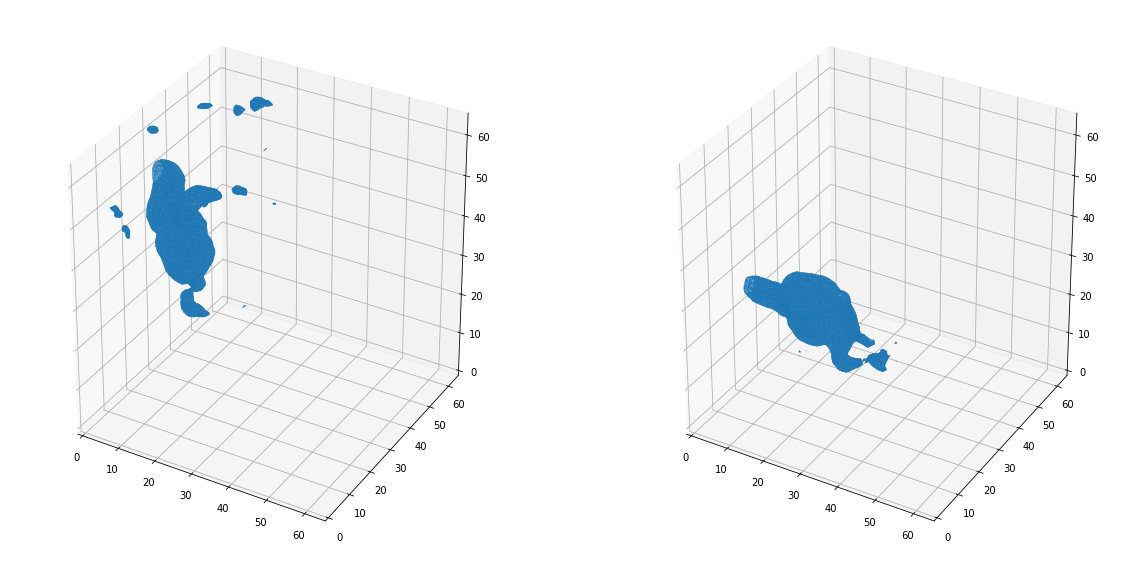

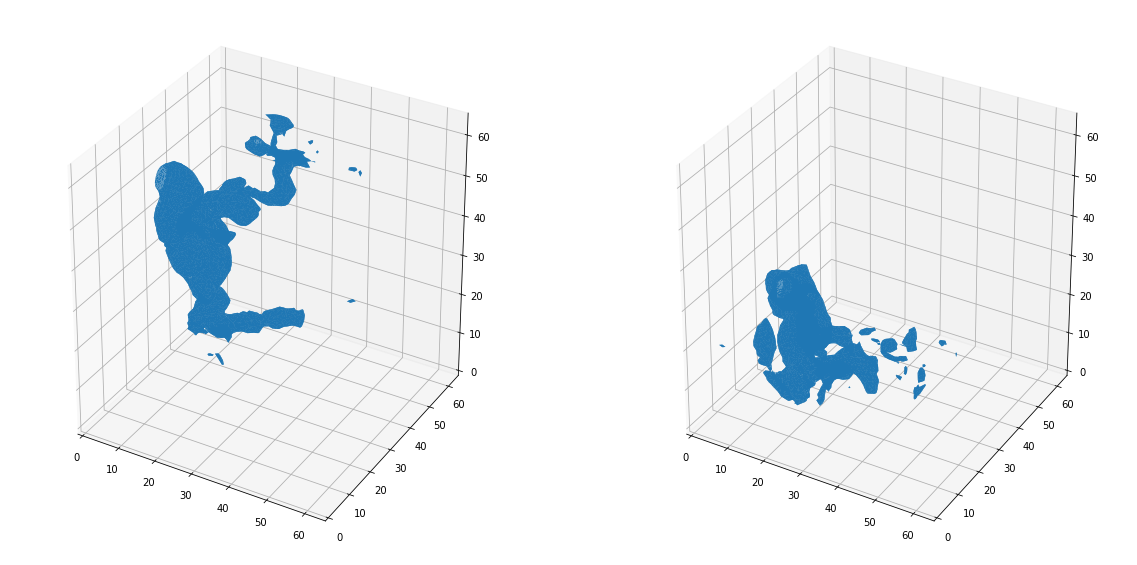

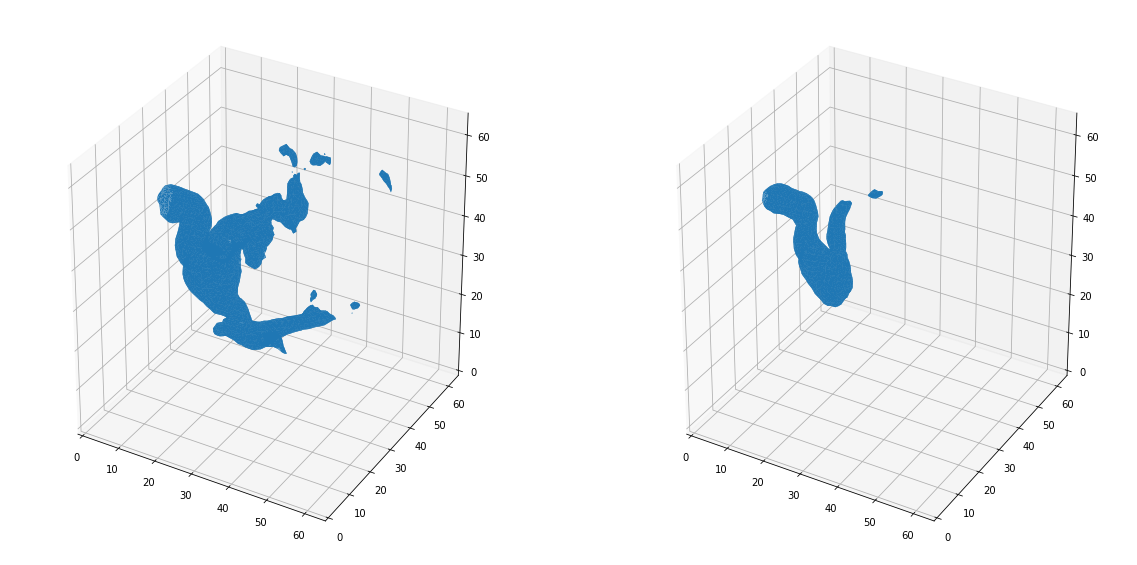

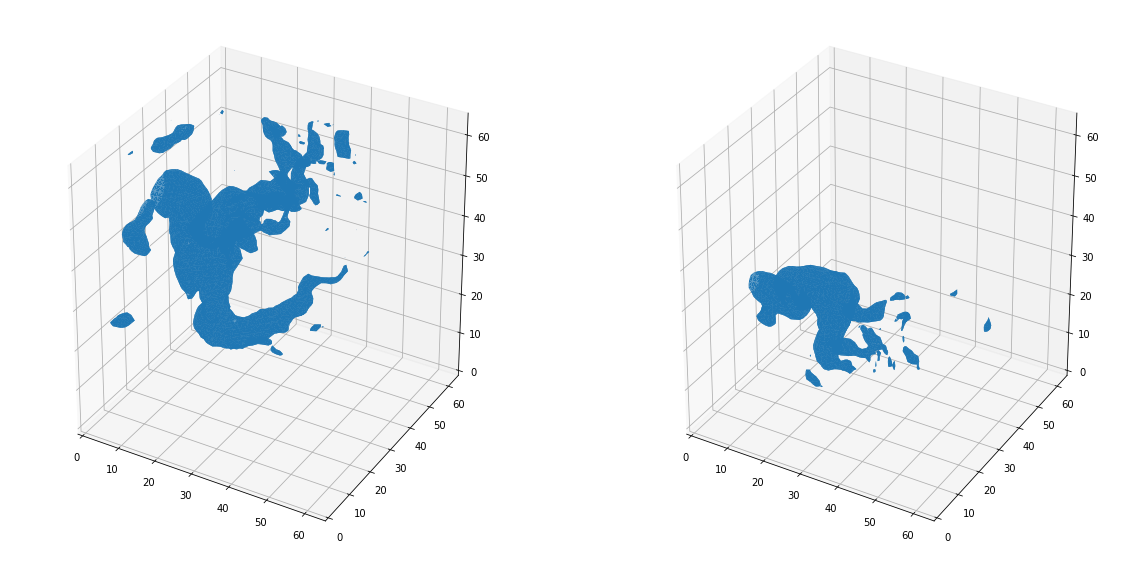

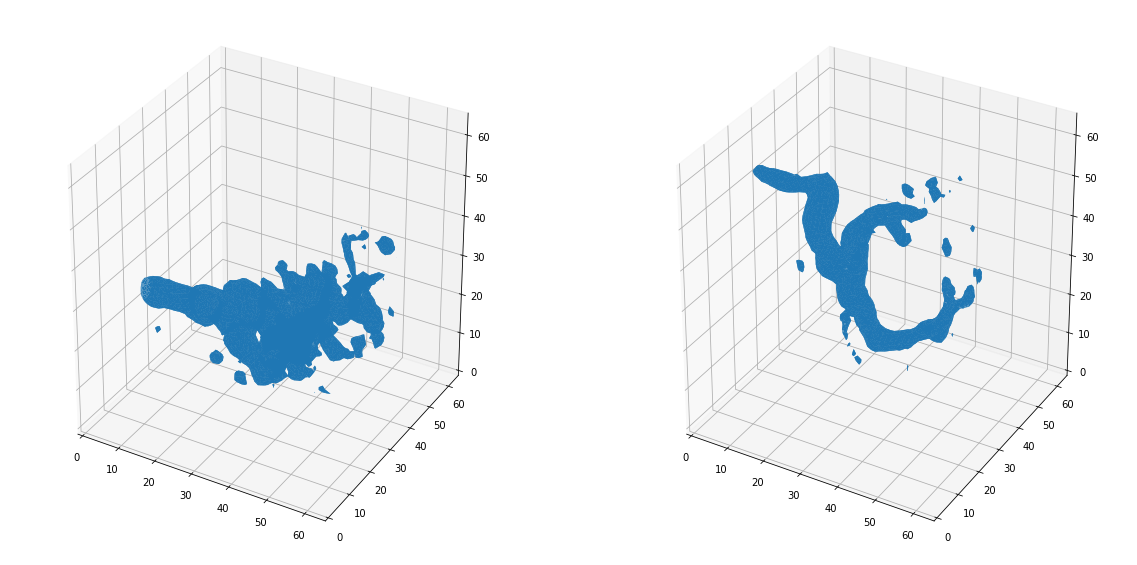

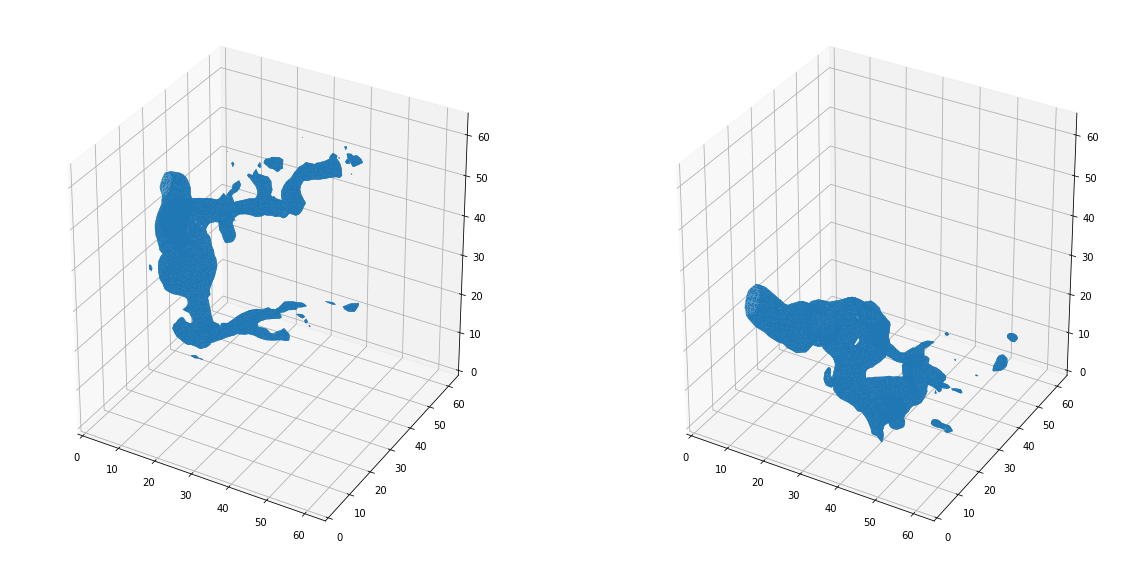

IndexError: list index out of range

In [10]:
#predict one data and visualize
n_slice = 64
size = 64
print(len(x_list))
confidence = 0.5
prediction = []

print(x_list[0].shape)
for image in x_list:
    prediction.append(model.predict(image.reshape(1,n_slice,size,size,1), steps=1))
    
    
#plt.hist(prediction[0].flatten())
predictions = np.array(prediction)
predictions[predictions>=confidence] = 1
predictions[predictions<confidence] = 0

for i in range(len(prediction)/2):
    utils.plot_3d(np.squeeze(prediction[i*2]), np.squeeze(prediction[i*2+1]), threshold=0.5, threshold2=0.5)